<a href="https://colab.research.google.com/github/ujwalvk/Barcode-Detector/blob/main/Barcode_detection_AWB_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install ultralytics opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [12]:
import os
import zipfile
import random
import shutil

# Paths
zip_path = "/content/data.zip.zip"  # Change this to your actual ZIP file path
extract_path = "barcode_dataset"

# 1️⃣ Extract ZIP File
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Ensure folders exist
os.makedirs(f"{extract_path}/images/train", exist_ok=True)
os.makedirs(f"{extract_path}/images/val", exist_ok=True)
os.makedirs(f"{extract_path}/labels/train", exist_ok=True)
os.makedirs(f"{extract_path}/labels/val", exist_ok=True)

# Get images and labels
image_files = [f for f in os.listdir(f"{extract_path}/images") if f.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(image_files)  # Shuffle for randomness

# Split 80% train, 20% val
split_index = int(0.8 * len(image_files))
train_files, val_files = image_files[:split_index], image_files[split_index:]

# Function to move files
def move_files(file_list, src_img_folder, src_label_folder, dest_img_folder, dest_label_folder):
    for file in file_list:
        base_name = os.path.splitext(file)[0]
        img_src = os.path.join(src_img_folder, file)
        label_src = os.path.join(src_label_folder, base_name + ".txt")

        img_dest = os.path.join(dest_img_folder, file)
        label_dest = os.path.join(dest_label_folder, base_name + ".txt")

        if os.path.exists(img_src) and os.path.exists(label_src):  # Move only if both exist
            shutil.move(img_src, img_dest)
            shutil.move(label_src, label_dest)

# Move training and validation files
move_files(train_files, f"{extract_path}/images", f"{extract_path}/labels", f"{extract_path}/images/train", f"{extract_path}/labels/train")
move_files(val_files, f"{extract_path}/images", f"{extract_path}/labels", f"{extract_path}/images/val", f"{extract_path}/labels/val")

# 2️⃣ Create `data.yaml`
yaml_content = f"""
train: {os.path.abspath(extract_path)}/images/train
val: {os.path.abspath(extract_path)}/images/val
nc: 1
names: ["Barcode"]
"""

with open(f"{extract_path}/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ Dataset prepared successfully!")


✅ Dataset prepared successfully!


In [13]:
from ultralytics import YOLO

# Load YOLOv8 pre-trained model
model = YOLO("yolov8s.pt")

# Train the model using the prepared dataset
model.train(data="barcode_dataset/data.yaml", epochs=50, imgsz=640)

print("✅ Training complete! Check 'runs/detect/train' for results.")


100%|██████████| 21.5M/21.5M [00:00<00:00, 45.3MB/s]


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=barcode_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 3.69MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/barcode_dataset/labels/train... 29 images, 0 backgrounds, 1 corrupt: 100%|██████████| 29/29 [00:00<00:00, 179.94it/s]

train: WARNING ⚠️ /content/barcode_dataset/images/train/3da59beb-img_30.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.7786]
train: New cache created: /content/barcode_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/barcode_dataset/labels/val... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<00:00, 1803.42it/s]

val: New cache created: /content/barcode_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.598      8.319      2.167         20        640: 100%|██████████| 2/2 [01:23<00:00, 41.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.79s/it]

                   all          8          8    0.00167        0.5    0.00213   0.000784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.562      5.552      2.139         30        640: 100%|██████████| 2/2 [01:15<00:00, 37.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.99s/it]

                   all          8          8    0.00693      0.625    0.00821    0.00264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.104       4.89      1.776         23        640: 100%|██████████| 2/2 [01:13<00:00, 36.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.55s/it]

                   all          8          8     0.0854      0.125     0.0469      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.844      4.036      1.608         22        640: 100%|██████████| 2/2 [01:10<00:00, 35.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.22s/it]

                   all          8          8      0.295      0.625      0.345      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.875      3.023      1.599         26        640: 100%|██████████| 2/2 [01:06<00:00, 33.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.42s/it]

                   all          8          8     0.0401      0.375     0.0415     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.448      2.367      1.352         21        640: 100%|██████████| 2/2 [01:08<00:00, 34.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.81s/it]

                   all          8          8       0.04       0.75     0.0403     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.506      2.045      1.395         26        640: 100%|██████████| 2/2 [01:05<00:00, 32.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.55s/it]

                   all          8          8       0.12       0.75      0.113     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.58      1.974      1.442         25        640: 100%|██████████| 2/2 [01:05<00:00, 32.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]

                   all          8          8     0.0823      0.875     0.0754     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.633      1.899       1.49         24        640: 100%|██████████| 2/2 [01:06<00:00, 33.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.68s/it]

                   all          8          8      0.822       0.75      0.639      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.653      1.705      1.374         27        640: 100%|██████████| 2/2 [01:03<00:00, 31.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.70s/it]

                   all          8          8      0.733      0.375      0.445      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.466      1.567      1.324         24        640: 100%|██████████| 2/2 [01:04<00:00, 32.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]

                   all          8          8      0.729       0.75      0.593        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.486      1.495       1.39         27        640: 100%|██████████| 2/2 [01:05<00:00, 32.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.42s/it]

                   all          8          8      0.738       0.75       0.64        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.229      1.372      1.198         28        640: 100%|██████████| 2/2 [01:03<00:00, 31.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]

                   all          8          8       0.74       0.75      0.591      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.419      1.395      1.332         26        640: 100%|██████████| 2/2 [01:06<00:00, 33.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]

                   all          8          8      0.739       0.75      0.621      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G       1.46      1.475       1.35         27        640: 100%|██████████| 2/2 [01:06<00:00, 33.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.57s/it]

                   all          8          8      0.788       0.75      0.657      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.393      1.242      1.252         25        640: 100%|██████████| 2/2 [01:04<00:00, 32.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.70s/it]

                   all          8          8      0.289        0.5      0.378      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.365      1.327      1.194         34        640: 100%|██████████| 2/2 [01:05<00:00, 32.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.81s/it]

                   all          8          8      0.377      0.625       0.51      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G       1.32       1.16      1.225         30        640: 100%|██████████| 2/2 [01:04<00:00, 32.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.68s/it]

                   all          8          8      0.844      0.683      0.811      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.321      1.165      1.264         25        640: 100%|██████████| 2/2 [01:03<00:00, 31.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.70s/it]

                   all          8          8      0.883      0.625      0.766      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.169      1.085      1.113         32        640: 100%|██████████| 2/2 [01:03<00:00, 31.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.68s/it]

                   all          8          8          1      0.726      0.746      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.125      1.034      1.139         27        640: 100%|██████████| 2/2 [01:05<00:00, 32.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.37s/it]

                   all          8          8      0.843       0.75      0.729      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G       1.16      1.004      1.183         19        640: 100%|██████████| 2/2 [01:04<00:00, 32.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.64s/it]

                   all          8          8      0.271       0.75      0.273      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.219      1.113       1.15         26        640: 100%|██████████| 2/2 [01:07<00:00, 33.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]

                   all          8          8     0.0946      0.875     0.0983     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.267      1.003      1.198         26        640: 100%|██████████| 2/2 [01:05<00:00, 32.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.23s/it]

                   all          8          8      0.093       0.75     0.0803     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.173     0.9941      1.171         32        640: 100%|██████████| 2/2 [01:03<00:00, 31.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.86s/it]

                   all          8          8     0.0485       0.75     0.0441     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.326      1.099      1.247         25        640: 100%|██████████| 2/2 [01:04<00:00, 32.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]

                   all          8          8     0.0421      0.625     0.0331     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.087     0.9102      1.161         20        640: 100%|██████████| 2/2 [01:05<00:00, 32.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.69s/it]

                   all          8          8     0.0419      0.625     0.0298     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.046     0.8902      1.131         31        640: 100%|██████████| 2/2 [01:04<00:00, 32.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]

                   all          8          8     0.0419      0.625     0.0298     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.044     0.8568      1.111         22        640: 100%|██████████| 2/2 [01:03<00:00, 31.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.69s/it]

                   all          8          8     0.0618      0.625     0.0535     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.046     0.8256      1.091         28        640: 100%|██████████| 2/2 [01:04<00:00, 32.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]

                   all          8          8      0.226      0.585      0.151     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.144     0.9052      1.169         23        640: 100%|██████████| 2/2 [01:07<00:00, 33.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]

                   all          8          8      0.226      0.585      0.151     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.009     0.7718      1.168         21        640: 100%|██████████| 2/2 [01:04<00:00, 32.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.73s/it]

                   all          8          8      0.218      0.489      0.181      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.183     0.8541      1.198         25        640: 100%|██████████| 2/2 [01:06<00:00, 33.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]

                   all          8          8      0.089      0.625     0.0675     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.021     0.7169      1.068         19        640: 100%|██████████| 2/2 [01:05<00:00, 32.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.28s/it]

                   all          8          8      0.089      0.625     0.0675     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.048     0.8292      1.137         24        640: 100%|██████████| 2/2 [01:05<00:00, 32.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.89s/it]

                   all          8          8      0.681      0.625      0.626      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.095     0.8219       1.23         22        640: 100%|██████████| 2/2 [01:05<00:00, 32.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.62s/it]

                   all          8          8      0.636       0.75      0.685      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.018     0.6811      1.097         29        640: 100%|██████████| 2/2 [01:04<00:00, 32.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]

                   all          8          8      0.636       0.75      0.685      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.147     0.8205       1.17         23        640: 100%|██████████| 2/2 [01:05<00:00, 32.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]

                   all          8          8      0.863      0.875      0.828      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.046     0.7661      1.104         25        640: 100%|██████████| 2/2 [01:06<00:00, 33.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.11s/it]

                   all          8          8      0.854      0.875      0.865      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9174     0.7142      1.035         27        640: 100%|██████████| 2/2 [01:05<00:00, 32.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.91s/it]

                   all          8          8      0.854      0.875      0.865      0.388


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9246     0.7537      1.136         13        640: 100%|██████████| 2/2 [01:04<00:00, 32.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.58s/it]

                   all          8          8      0.994       0.75       0.86      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G       1.07     0.8405      1.292         13        640: 100%|██████████| 2/2 [01:05<00:00, 32.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.68s/it]

                   all          8          8      0.873       0.75      0.878      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9397     0.8488       1.12         13        640: 100%|██████████| 2/2 [01:04<00:00, 32.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]

                   all          8          8      0.873       0.75      0.878      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.013     0.7934      1.253         13        640: 100%|██████████| 2/2 [01:03<00:00, 31.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.65s/it]

                   all          8          8      0.986      0.875      0.935      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9109     0.7584      1.173         12        640: 100%|██████████| 2/2 [01:06<00:00, 33.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.20s/it]

                   all          8          8      0.986      0.875      0.935      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9722     0.7939      1.183         12        640: 100%|██████████| 2/2 [01:03<00:00, 31.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.26s/it]

                   all          8          8          1      0.992      0.995        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8868     0.6852      1.123         12        640: 100%|██████████| 2/2 [01:03<00:00, 31.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.59s/it]

                   all          8          8          1      0.992      0.995        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8175      0.769      1.125         12        640: 100%|██████████| 2/2 [01:05<00:00, 32.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.68s/it]

                   all          8          8          1      0.993      0.995      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.7969     0.6877      1.082         13        640: 100%|██████████| 2/2 [01:05<00:00, 32.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]

                   all          8          8          1      0.993      0.995      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8819     0.9299      1.212         13        640: 100%|██████████| 2/2 [01:06<00:00, 33.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.72s/it]

                   all          8          8          1      0.992      0.995      0.401



50 epochs completed in 1.041 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.38s/it]


                   all          8          8          1      0.992      0.995      0.412
Speed: 2.5ms preprocess, 770.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train
✅ Training complete! Check 'runs/detect/train' for results.



0: 640x480 1 Barcode, 489.7ms
Speed: 6.1ms preprocess, 489.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
 ce0d42b9-img_47.jpg - Confidence: 0.38
  Upper Left: (1307, 1567)
  Upper Right: (1826, 1567)
  Lower Left: (1307, 1746)
  Lower Right: (1826, 1746)
--------------------------------------------------


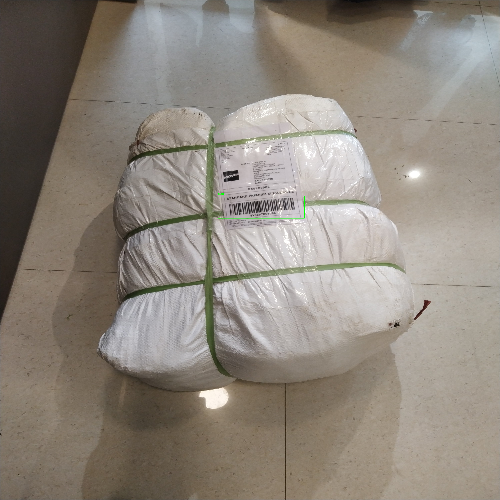


0: 384x640 1 Barcode, 434.6ms
Speed: 6.0ms preprocess, 434.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
 58512cb4-img_19.jpg - Confidence: 0.77
  Upper Left: (449, 119)
  Upper Right: (641, 119)
  Lower Left: (449, 197)
  Lower Right: (641, 197)
--------------------------------------------------


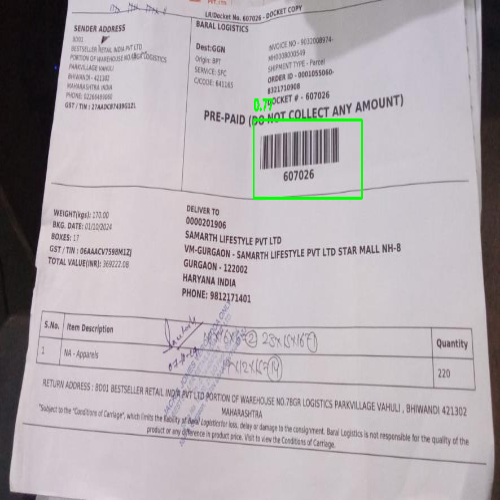


0: 288x640 2 Barcodes, 328.6ms
Speed: 3.8ms preprocess, 328.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)
 de538b97-Screenshot_2025-03-06_120020.png - Confidence: 0.83
  Upper Left: (1307, 39)
  Upper Right: (1846, 39)
  Lower Left: (1307, 241)
  Lower Right: (1846, 241)
--------------------------------------------------
 de538b97-Screenshot_2025-03-06_120020.png - Confidence: 0.32
  Upper Left: (1301, 37)
  Upper Right: (1853, 37)
  Lower Left: (1301, 168)
  Lower Right: (1853, 168)
--------------------------------------------------


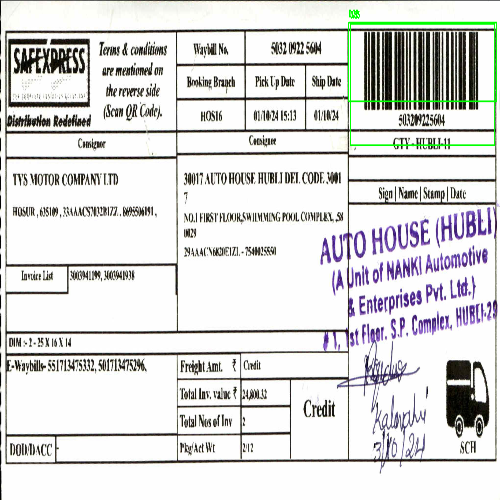


0: 448x640 1 Barcode, 487.0ms
Speed: 4.8ms preprocess, 487.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
 d5088f72-7.png - Confidence: 0.87
  Upper Left: (184, 236)
  Upper Right: (466, 236)
  Lower Left: (184, 314)
  Lower Right: (466, 314)
--------------------------------------------------


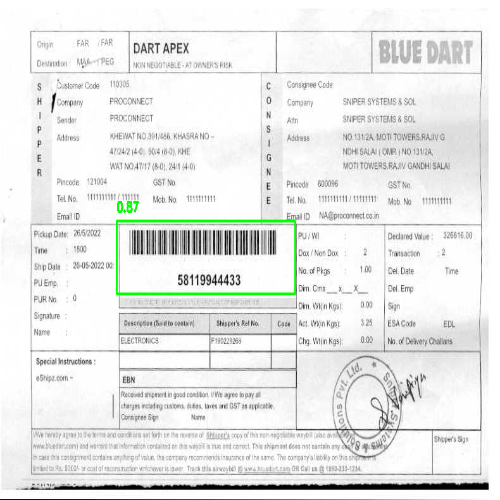


0: 640x480 1 Barcode, 508.3ms
Speed: 6.4ms preprocess, 508.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
 d6266c61-5.png - Confidence: 0.82
  Upper Left: (345, 327)
  Upper Right: (767, 327)
  Lower Left: (345, 449)
  Lower Right: (767, 449)
--------------------------------------------------


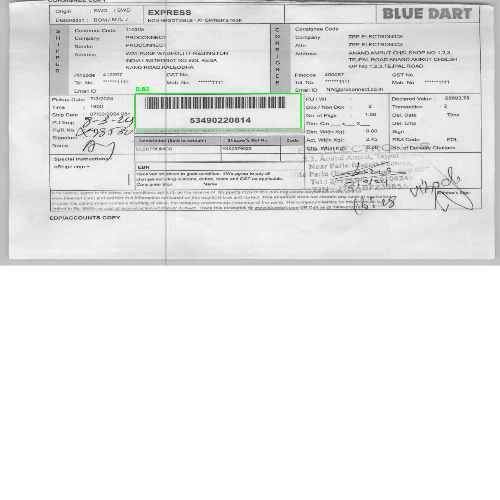


0: 640x448 1 Barcode, 490.9ms
Speed: 6.3ms preprocess, 490.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
 99ab9e29-6.png - Confidence: 0.83
  Upper Left: (201, 231)
  Upper Right: (480, 231)
  Lower Left: (201, 310)
  Lower Right: (480, 310)
--------------------------------------------------


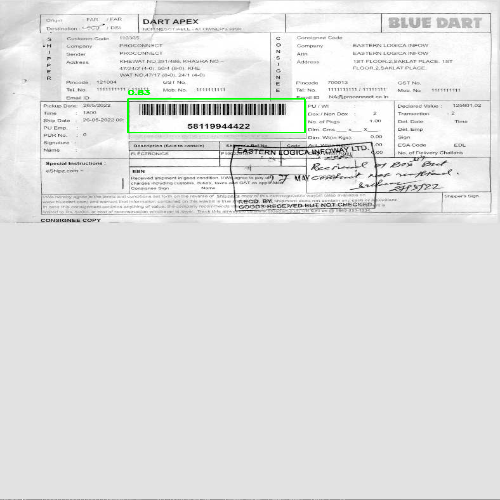


0: 640x480 1 Barcode, 515.2ms
Speed: 5.9ms preprocess, 515.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
 192d920e-2.png - Confidence: 0.79
  Upper Left: (320, 298)
  Upper Right: (734, 298)
  Lower Left: (320, 458)
  Lower Right: (734, 458)
--------------------------------------------------


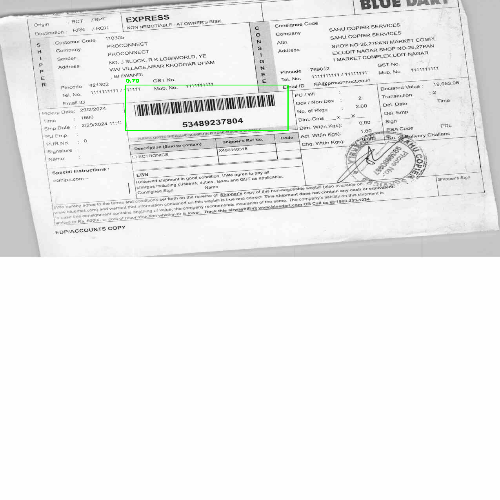


0: 416x640 2 Barcodes, 462.6ms
Speed: 5.5ms preprocess, 462.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
 fdb752f2-img_9.jpg - Confidence: 0.90
  Upper Left: (598, 41)
  Upper Right: (813, 41)
  Lower Left: (598, 108)
  Lower Right: (813, 108)
--------------------------------------------------
 fdb752f2-img_9.jpg - Confidence: 0.31
  Upper Left: (446, 30)
  Upper Right: (594, 30)
  Lower Left: (446, 71)
  Lower Right: (594, 71)
--------------------------------------------------


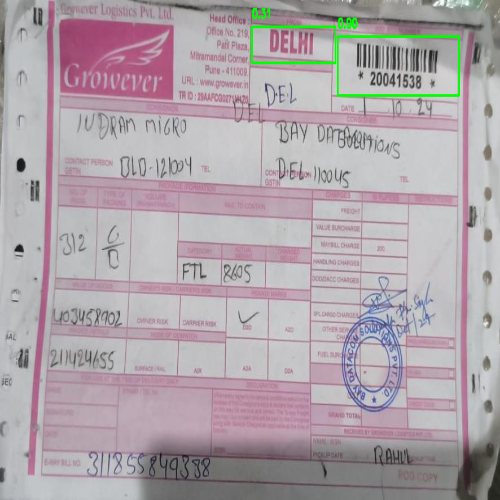

In [14]:
import cv2
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Import for Colab

# Load the trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to the validation images folder
val_folder = "barcode_dataset/images/val"  # Change this if needed
output_folder = "barcode_dataset/output"  # Save images with bounding boxes
os.makedirs(output_folder, exist_ok=True)  # Create output folder if not exists

# List all images in val folder
image_files = [f for f in os.listdir(val_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(val_folder, image_file)
    image = cv2.imread(image_path)

    # Check if image was loaded
    if image is None:
        print(f" Error: Could not load {image_file}")
        continue

    # Run YOLO detection
    results = model(image)

    # Process detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            confidence = box.conf[0].item()  # Confidence score

            # Compute all four corners
            upper_left = (x1, y1)
            upper_right = (x2, y1)
            lower_left = (x1, y2)
            lower_right = (x2, y2)

            # Print bounding box coordinates
            print(f" {image_file} - Confidence: {confidence:.2f}")
            print(f"  Upper Left: {upper_left}")
            print(f"  Upper Right: {upper_right}")
            print(f"  Lower Left: {lower_left}")
            print(f"  Lower Right: {lower_right}")
            print("-" * 50)

            # Draw bounding box and labels
            cv2.rectangle(image, upper_left, lower_right, (0, 255, 0), 2)
            cv2.putText(image, f"{confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the processed image
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, image)

    # Display the image in Colab
    resized_image = cv2.resize(image, (500, 500))
    cv2_imshow(resized_image)



0: 640x480 1 Barcode, 737.7ms
Speed: 5.5ms preprocess, 737.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


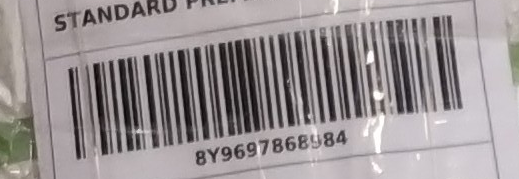


0: 384x640 1 Barcode, 625.2ms
Speed: 3.9ms preprocess, 625.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


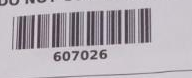


0: 288x640 2 Barcodes, 456.0ms
Speed: 3.8ms preprocess, 456.0ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 640)


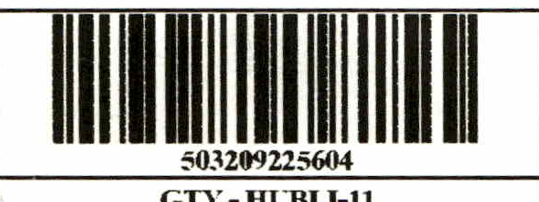

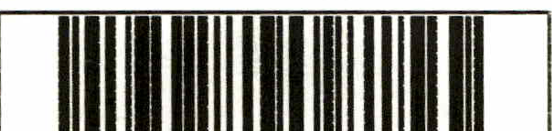


0: 448x640 1 Barcode, 701.1ms
Speed: 5.3ms preprocess, 701.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


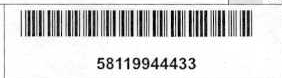


0: 640x480 1 Barcode, 610.3ms
Speed: 5.2ms preprocess, 610.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


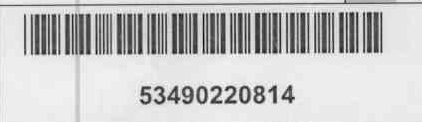


0: 640x448 1 Barcode, 447.7ms
Speed: 5.4ms preprocess, 447.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


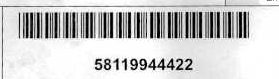


0: 640x480 1 Barcode, 525.8ms
Speed: 5.7ms preprocess, 525.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


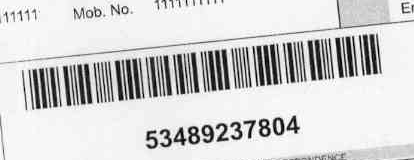


0: 416x640 2 Barcodes, 410.0ms
Speed: 4.4ms preprocess, 410.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


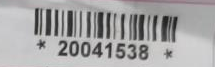

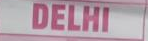

In [57]:
import cv2
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Import for Colab

# Load the trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to the validation images folder
val_folder = "barcode_dataset/images/val"  # Change if needed

# List all images in validation folder
image_files = [f for f in os.listdir(val_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(val_folder, image_file)
    image = cv2.imread(image_path)

    # Check if image was loaded
    if image is None:
        print(f"Error: Could not load {image_file}")
        continue

    # Run YOLO detection
    results = model(image)

    # Process detections
    barcode_detected = False  # Flag to check if barcode is found
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates

            # Crop the barcode
            cropped_barcode = image[y1:y2, x1:x2]

            # Display only the cropped barcode
            cv2_imshow(cropped_barcode)
            barcode_detected = True  # Mark as detected

    # If no barcode was detected, print a message
    if not barcode_detected:
        print(f"No barcode detected in {image_file}")


In [20]:
!pip install paddleocr paddlepaddle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 15.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e1313460bc9781ec7c8601f4db51ae576d8179c2b9df0be3f94465a1d69e06db
  Stored in

[2025/03/07 11:06:06] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

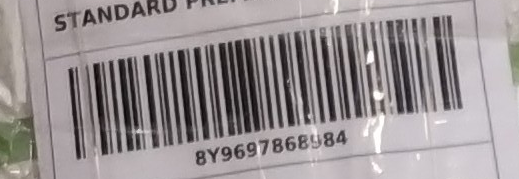

Extracted Alphanumeric Text: ['STANDARDP', '8Y9697868984']
Processing Time: 1.78 seconds

0: 384x640 1 Barcode, 414.8ms
Speed: 4.4ms preprocess, 414.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/07 11:06:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:13] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.11008834838867188
[2025/03/07 11:06:13] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12730956077575684

--- Barcode 1 from 58512cb4-img_19.jpg ---


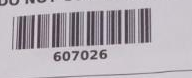

Extracted Alphanumeric Text: ['607026']
Processing Time: 2.46 seconds

0: 288x640 2 Barcodes, 318.0ms
Speed: 3.7ms preprocess, 318.0ms inference, 1.1ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/07 11:06:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:13] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.16875290870666504
[2025/03/07 11:06:13] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14665555953979492

--- Barcode 1 from de538b97-Screenshot_2025-03-06_120020.png ---


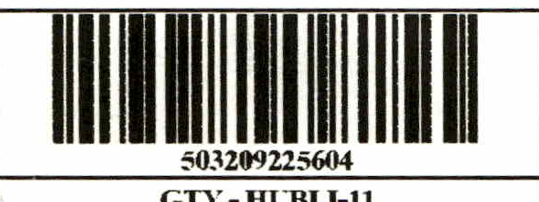

Extracted Alphanumeric Text: ['503209225604']
Processing Time: 3.18 seconds
[2025/03/07 11:06:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:14] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.16200041770935059
[2025/03/07 11:06:14] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06

--- Barcode 1 from de538b97-Screenshot_2025-03-06_120020.png ---


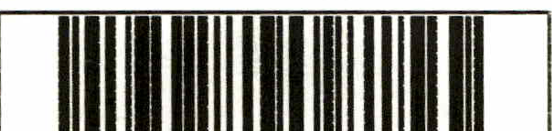

Extracted Alphanumeric Text: []
Processing Time: 3.37 seconds

0: 448x640 1 Barcode, 498.3ms
Speed: 4.5ms preprocess, 498.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/07 11:06:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1100471019744873
[2025/03/07 11:06:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07495450973510742

--- Barcode 1 from d5088f72-7.png ---


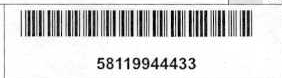

Extracted Alphanumeric Text: ['58119944433']
Processing Time: 4.09 seconds

0: 640x480 1 Barcode, 489.0ms
Speed: 6.2ms preprocess, 489.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
[2025/03/07 11:06:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:15] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.14171266555786133
[2025/03/07 11:06:15] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14681243896484375

--- Barcode 1 from d6266c61-5.png ---


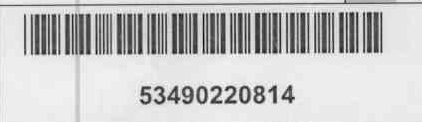

Extracted Alphanumeric Text: ['53490220814']
Processing Time: 4.91 seconds

0: 640x448 1 Barcode, 473.0ms
Speed: 5.3ms preprocess, 473.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
[2025/03/07 11:06:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:16] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.030680179595947266
[2025/03/07 11:06:16] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06629157066345215

--- Barcode 1 from 99ab9e29-6.png ---


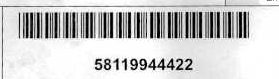

Extracted Alphanumeric Text: ['58119944422']
Processing Time: 5.51 seconds

0: 640x480 1 Barcode, 484.8ms
Speed: 6.1ms preprocess, 484.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
[2025/03/07 11:06:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:16] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.13883280754089355
[2025/03/07 11:06:17] ppocr DEBUG: rec_res num  : 4, elapsed : 0.4203941822052002

--- Barcode 1 from 192d920e-2.png ---


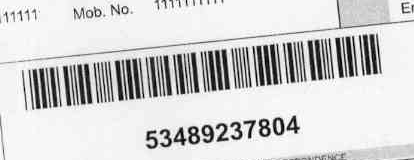

Extracted Alphanumeric Text: ['11111', 'MobNo', '53489237804']
Processing Time: 6.60 seconds

0: 416x640 2 Barcodes, 437.7ms
Speed: 6.2ms preprocess, 437.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/07 11:06:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10269284248352051
[2025/03/07 11:06:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07325863838195801

--- Barcode 1 from fdb752f2-img_9.jpg ---


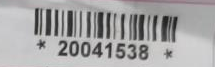

Extracted Alphanumeric Text: ['20041538']
Processing Time: 7.24 seconds
[2025/03/07 11:06:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:06:18] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0894927978515625
[2025/03/07 11:06:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0789024829864502

--- Barcode 1 from fdb752f2-img_9.jpg ---


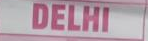

Extracted Alphanumeric Text: ['DELHI']
Processing Time: 7.42 seconds


In [67]:
import cv2
import os
import re
import time
from ultralytics import YOLO
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow  # For Colab image display

# Load the trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Initialize PaddleOCR
reader = PaddleOCR(lang="en")

# Path to the validation images folder
val_folder = "barcode_dataset/images/val"  # Change if needed
start_time = time.time()  # Start timer
# List all images in validation folder
image_files = [f for f in os.listdir(val_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(val_folder, image_file)
    image = cv2.imread(image_path)

    # Check if image was loaded
    if image is None:
        print(f"Error: Could not load {image_file}")
        continue

    # Run YOLO detection
    results = model(image)

    # Process detections
    barcode_detected = False  # Flag to check if barcode is found
    for idx, result in enumerate(results):
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates

            # Ensure valid crop
            h, w, _ = image.shape
            if not (0 <= x1 < w and 0 <= x2 <= w and 0 <= y1 < h and 0 <= y2 <= h):
                print(f"⚠️ Skipping invalid crop in {image_file}: {x1, y1, x2, y2}")
                continue

            # Crop the barcode
            cropped_barcode = image[y1:y2, x1:x2]

            # Ensure it's not empty
            if cropped_barcode.size == 0:
                print(f"⚠️ Empty crop detected in {image_file}")
                continue

            # Perform OCR
            result_ocr = reader.ocr(cropped_barcode)

            # Extract alphanumeric text (letters + numbers, no special chars)
            extracted_texts = []
            if result_ocr and result_ocr[0]:
                for text_info in result_ocr[0]:
                    raw_text = text_info[1][0].replace(" ", "")  # Remove spaces
                    alphanumeric_text = re.sub(r'[^A-Z0-9]', '', raw_text, flags=re.IGNORECASE)  # Keep only A-Z & 0-9
                    if alphanumeric_text:
                        extracted_texts.append(alphanumeric_text)

            # Display cropped barcode image
            print(f"\n--- Barcode {idx + 1} from {image_file} ---")
            cv2_imshow(cropped_barcode)

            # Print extracted alphanumeric text
            print(f"Extracted Alphanumeric Text: {extracted_texts}")
            print(f"Processing Time: {time.time() - start_time:.2f} seconds")
            barcode_detected = True  # Mark as detected

    # If no barcode was detected, print a message
    if not barcode_detected:
        print(f"No barcode detected in {image_file}")




In [61]:
from google.colab import files
files.download("runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
from google.colab import files
uploaded = files.upload()  # Upload best.pt manually



Saving best (1).pt to best (1).pt


In [64]:
from ultralytics import YOLO

# Load the saved model from Google Drive or local path
model = YOLO("best (1).pt")  # Adjust path if needed


In [65]:
model.info()  # Check model details


Model summary: 129 layers, 11,135,987 parameters, 0 gradients, 28.6 GFLOPs


(129, 11135987, 0, 28.6469632)

In [66]:
!pip install rapidocr_onnxruntime
!wget -O 2.jpg https://pic1.zhimg.com/v2-612e2d58bd9f5f4a99c448a4d626ce86_1440w.jpg?source=172ae18b
!wget https://github.com/RapidAI/RapidOCR/releases/download/v1.1.0/FZYTK.TTF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00
--2025-03-07 11:03:03--  https://pic1.zhimg.com/v2-612e2d58bd9f5f4a99c448a4d626ce86_1440w.jpg?source=172ae18b
Resolving pic1.zhimg.com (pic1.zhimg.com)... 175.99.198.179, 128.1.102.212, 107.155.58.204, ...
Connecting to pic1.zhimg.com (pic1.zhimg.com)|175.99.198.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56847 (56K) [image/jpeg]
Saving to: ‘2.jpg’

2.jpg               100%[===================>]  55.51K  --.-KB/s    in 0.005s  

2025-03-07 11:03:04 (10.5 MB/s) - ‘2.jpg’ saved [56847/56847]

--2025-03-07 11:03:04--  https://github.com/RapidAI/RapidOCR/releases/download/v1.1.0/FZYTK.TTF
Resolving github.com (github.com)... 20.27.177.113
Connectin


0: 640x480 1 Barcode, 476.8ms
Speed: 7.3ms preprocess, 476.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

--- Barcode 1 from ce0d42b9-img_47.jpg ---


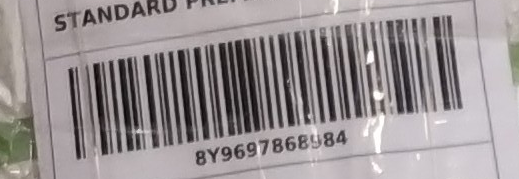

Extracted Alphanumeric Text: ['STANDARD', '8Y9697868984']
Processing Time: 1.94 seconds

0: 384x640 1 Barcode, 408.1ms
Speed: 4.0ms preprocess, 408.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

--- Barcode 1 from 58512cb4-img_19.jpg ---


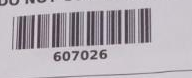

Extracted Alphanumeric Text: ['607026']
Processing Time: 3.56 seconds

0: 288x640 2 Barcodes, 469.0ms
Speed: 3.4ms preprocess, 469.0ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)

--- Barcode 1 from de538b97-Screenshot_2025-03-06_120020.png ---


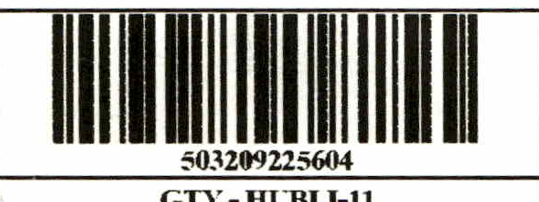

Extracted Alphanumeric Text: ['503209225604']
Processing Time: 5.34 seconds

--- Barcode 1 from de538b97-Screenshot_2025-03-06_120020.png ---


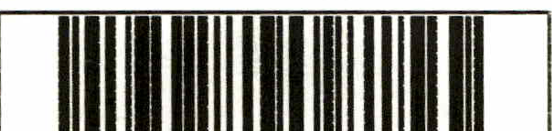

⚠️ No text extracted!
Processing Time: 6.82 seconds

0: 448x640 1 Barcode, 459.4ms
Speed: 5.0ms preprocess, 459.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

--- Barcode 1 from d5088f72-7.png ---


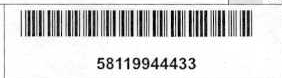

Extracted Alphanumeric Text: ['58119944433']
Processing Time: 8.57 seconds

0: 640x480 1 Barcode, 469.4ms
Speed: 5.2ms preprocess, 469.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

--- Barcode 1 from d6266c61-5.png ---


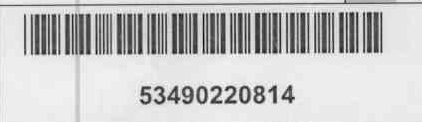

Extracted Alphanumeric Text: ['53490220814']
Processing Time: 10.46 seconds

0: 640x448 1 Barcode, 452.5ms
Speed: 5.6ms preprocess, 452.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)

--- Barcode 1 from 99ab9e29-6.png ---


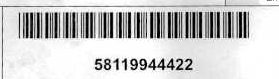

Extracted Alphanumeric Text: ['58119944422']
Processing Time: 12.19 seconds

0: 640x480 1 Barcode, 500.2ms
Speed: 5.8ms preprocess, 500.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

--- Barcode 1 from 192d920e-2.png ---


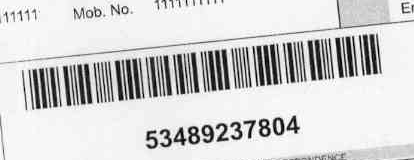

Extracted Alphanumeric Text: ['11111', 'MobNo', 'LLLLL', 'E', '53489237804']
Processing Time: 14.00 seconds

0: 416x640 2 Barcodes, 433.1ms
Speed: 4.6ms preprocess, 433.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

--- Barcode 1 from fdb752f2-img_9.jpg ---


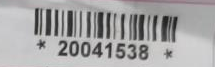

Extracted Alphanumeric Text: ['20041538', 'k']
Processing Time: 15.73 seconds

--- Barcode 1 from fdb752f2-img_9.jpg ---


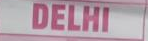

⚠️ No text extracted!
Processing Time: 17.34 seconds


In [72]:
import cv2
import os
import re
import time
from ultralytics import YOLO
from rapidocr_onnxruntime import RapidOCR
from google.colab.patches import cv2_imshow  # For Colab image display

# Load the trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Initialize RapidOCR
engine = RapidOCR()

# Path to the validation images folder
val_folder = "barcode_dataset/images/val"  # Change if needed
start_time = time.time()  # Start timer

# List all images in validation folder
image_files = [f for f in os.listdir(val_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(val_folder, image_file)
    image = cv2.imread(image_path)

    # Check if image was loaded
    if image is None:
        print(f"Error: Could not load {image_file}")
        continue

    # Run YOLO detection
    results = model(image)

    # Process detections
    barcode_detected = False  # Flag to check if barcode is found
    for idx, result in enumerate(results):
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates

            # Ensure valid crop
            h, w, _ = image.shape
            if not (0 <= x1 < w and 0 <= x2 <= w and 0 <= y1 < h and 0 <= y2 <= h):
                print(f"⚠️ Skipping invalid crop in {image_file}: {x1, y1, x2, y2}")
                continue

            # Crop the barcode
            cropped_barcode = image[y1:y2, x1:x2]

            # Ensure it's not empty
            if cropped_barcode.size == 0:
                print(f"⚠️ Empty crop detected in {image_file}")
                continue

            # Perform OCR using RapidOCR
            result_ocr, _ = engine(cropped_barcode)

            # Extract alphanumeric text (letters + numbers, no special chars)
            extracted_texts = []
            if result_ocr:  # Ensure OCR result is not empty
                for text_info in result_ocr:
                    raw_text = text_info[1].replace(" ", "")  # Remove spaces
                    alphanumeric_text = re.sub(r'[^A-Z0-9]', '', raw_text, flags=re.IGNORECASE)  # Keep only A-Z & 0-9
                    if alphanumeric_text:
                        extracted_texts.append(alphanumeric_text)

            # Display cropped barcode image
            print(f"\n--- Barcode {idx + 1} from {image_file} ---")
            cv2_imshow(cropped_barcode)

            # Print extracted alphanumeric text
            print(f"Extracted Alphanumeric Text: {extracted_texts}" if extracted_texts else "⚠️ No text extracted!")
            print(f"Processing Time: {time.time() - start_time:.2f} seconds")
            barcode_detected = True  # Mark as detected

    # If no barcode was detected, print a message
    if not barcode_detected:
        print(f"No barcode detected in {image_file}")


[2025/03/07 11:21:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

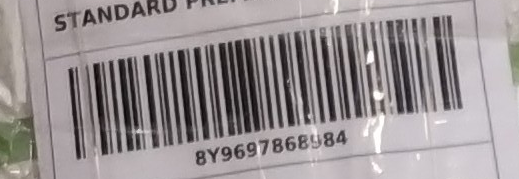

PaddleOCR: ['STANDARDP', '8Y9697868984'] (Time: 0.34s)
RapidOCR: ['STANDARD', '8Y9697868984'] (Time: 1.09s)

0: 384x640 1 Barcode, 505.5ms
Speed: 4.0ms preprocess, 505.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/07 11:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:00] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.12262511253356934
[2025/03/07 11:22:00] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13413715362548828

--- Barcode 1 from 58512cb4-img_19.jpg ---


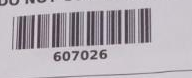

PaddleOCR: ['607026'] (Time: 0.26s)
RapidOCR: ['607026'] (Time: 1.30s)

0: 288x640 2 Barcodes, 487.9ms
Speed: 3.2ms preprocess, 487.9ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/07 11:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.23500418663024902
[2025/03/07 11:22:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.18056941032409668

--- Barcode 1 from de538b97-Screenshot_2025-03-06_120020.png ---


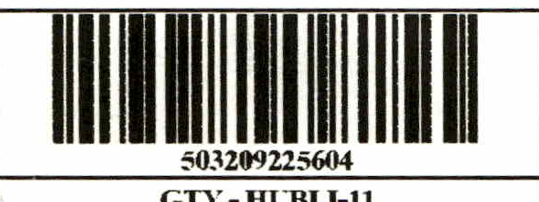

PaddleOCR: ['503209225604'] (Time: 0.42s)
RapidOCR: ['503209225604'] (Time: 0.92s)
[2025/03/07 11:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:03] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.1368718147277832
[2025/03/07 11:22:03] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06

--- Barcode 1 from de538b97-Screenshot_2025-03-06_120020.png ---


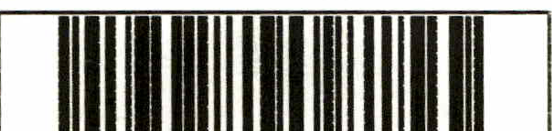

PaddleOCR: [] (Time: 0.14s)
RapidOCR: [] (Time: 1.37s)

0: 448x640 1 Barcode, 439.1ms
Speed: 5.3ms preprocess, 439.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/07 11:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10696697235107422
[2025/03/07 11:22:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0606844425201416

--- Barcode 1 from d5088f72-7.png ---


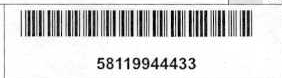

PaddleOCR: ['58119944433'] (Time: 0.17s)
RapidOCR: ['58119944433'] (Time: 1.38s)

0: 640x480 1 Barcode, 479.5ms
Speed: 5.3ms preprocess, 479.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
[2025/03/07 11:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.13073372840881348
[2025/03/07 11:22:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1168828010559082

--- Barcode 1 from d6266c61-5.png ---


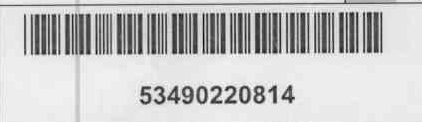

PaddleOCR: ['53490220814'] (Time: 0.25s)
RapidOCR: ['53490220814'] (Time: 1.36s)

0: 640x448 1 Barcode, 444.6ms
Speed: 5.0ms preprocess, 444.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
[2025/03/07 11:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03090500831604004
[2025/03/07 11:22:09] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07775402069091797

--- Barcode 1 from 99ab9e29-6.png ---


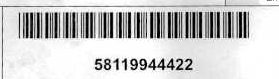

PaddleOCR: ['58119944422'] (Time: 0.11s)
RapidOCR: ['58119944422'] (Time: 1.24s)

0: 640x480 1 Barcode, 472.4ms
Speed: 5.8ms preprocess, 472.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
[2025/03/07 11:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:11] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.12630271911621094
[2025/03/07 11:22:11] ppocr DEBUG: rec_res num  : 4, elapsed : 0.29026055335998535

--- Barcode 1 from 192d920e-2.png ---


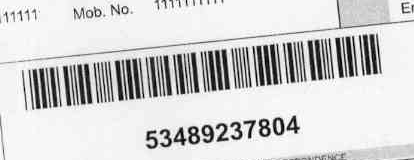

PaddleOCR: ['11111', 'MobNo', '53489237804'] (Time: 0.42s)
RapidOCR: ['11111', 'MobNo', 'LLLLL', 'E', '53489237804'] (Time: 1.44s)

0: 416x640 2 Barcodes, 664.0ms
Speed: 4.3ms preprocess, 664.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/07 11:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.12483000755310059
[2025/03/07 11:22:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0943152904510498

--- Barcode 1 from fdb752f2-img_9.jpg ---


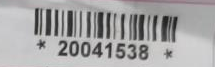

PaddleOCR: ['20041538'] (Time: 0.22s)
RapidOCR: ['20041538', 'k'] (Time: 2.11s)
[2025/03/07 11:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/03/07 11:22:16] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.13993597030639648
[2025/03/07 11:22:16] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11058211326599121

--- Barcode 1 from fdb752f2-img_9.jpg ---


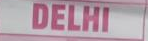

PaddleOCR: ['DELHI'] (Time: 0.25s)
RapidOCR: [] (Time: 1.56s)

--- OCR Timing Summary ---
Image: ce0d42b9-img_47.jpg | PaddleOCR: 0.34s | RapidOCR: 1.09s
Image: 58512cb4-img_19.jpg | PaddleOCR: 0.26s | RapidOCR: 1.30s
Image: de538b97-Screenshot_2025-03-06_120020.png | PaddleOCR: 0.42s | RapidOCR: 0.92s
Image: de538b97-Screenshot_2025-03-06_120020.png | PaddleOCR: 0.14s | RapidOCR: 1.37s
Image: d5088f72-7.png | PaddleOCR: 0.17s | RapidOCR: 1.38s
Image: d6266c61-5.png | PaddleOCR: 0.25s | RapidOCR: 1.36s
Image: 99ab9e29-6.png | PaddleOCR: 0.11s | RapidOCR: 1.24s
Image: 192d920e-2.png | PaddleOCR: 0.42s | RapidOCR: 1.44s
Image: fdb752f2-img_9.jpg | PaddleOCR: 0.22s | RapidOCR: 2.11s
Image: fdb752f2-img_9.jpg | PaddleOCR: 0.25s | RapidOCR: 1.56s


In [73]:
import cv2
import os
import re
import time
from ultralytics import YOLO
from paddleocr import PaddleOCR
from rapidocr_onnxruntime import RapidOCR
from google.colab.patches import cv2_imshow  # For Colab image display

# Load the trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Initialize PaddleOCR and RapidOCR
paddle_reader = PaddleOCR(lang="en")
rapid_engine = RapidOCR()

# Path to the validation images folder
val_folder = "barcode_dataset/images/val"  # Change if needed

# List all images in validation folder
image_files = [f for f in os.listdir(val_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Store time records
timing_results = []

# Process each image
for image_file in image_files:
    image_path = os.path.join(val_folder, image_file)
    image = cv2.imread(image_path)

    # Check if image was loaded
    if image is None:
        print(f"Error: Could not load {image_file}")
        continue

    # Run YOLO detection
    results = model(image)

    # Process detections
    for idx, result in enumerate(results):
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates

            # Ensure valid crop
            h, w, _ = image.shape
            if not (0 <= x1 < w and 0 <= x2 <= w and 0 <= y1 < h and 0 <= y2 <= h):
                print(f"⚠️ Skipping invalid crop in {image_file}: {x1, y1, x2, y2}")
                continue

            # Crop the barcode
            cropped_barcode = image[y1:y2, x1:x2]

            # Ensure it's not empty
            if cropped_barcode.size == 0:
                print(f"⚠️ Empty crop detected in {image_file}")
                continue

            # --- PaddleOCR Processing ---
            start_time_paddle = time.time()
            paddle_result = paddle_reader.ocr(cropped_barcode)
            paddle_time = time.time() - start_time_paddle  # Record time taken

            # Extract alphanumeric text
            paddle_texts = []
            if paddle_result and paddle_result[0]:
                for text_info in paddle_result[0]:
                    raw_text = text_info[1][0].replace(" ", "")  # Remove spaces
                    alphanumeric_text = re.sub(r'[^A-Z0-9]', '', raw_text, flags=re.IGNORECASE)
                    if alphanumeric_text:
                        paddle_texts.append(alphanumeric_text)

            # --- RapidOCR Processing ---
            start_time_rapid = time.time()
            rapid_result, _ = rapid_engine(cropped_barcode)
            rapid_time = time.time() - start_time_rapid  # Record time taken

            # Extract alphanumeric text
            rapid_texts = []
            if rapid_result:
                for text_info in rapid_result:
                    raw_text = text_info[1].replace(" ", "")
                    alphanumeric_text = re.sub(r'[^A-Z0-9]', '', raw_text, flags=re.IGNORECASE)
                    if alphanumeric_text:
                        rapid_texts.append(alphanumeric_text)

            # Display cropped barcode
            print(f"\n--- Barcode {idx + 1} from {image_file} ---")
            cv2_imshow(cropped_barcode)

            # Print extracted alphanumeric text and processing times
            print(f"PaddleOCR: {paddle_texts} (Time: {paddle_time:.2f}s)")
            print(f"RapidOCR: {rapid_texts} (Time: {rapid_time:.2f}s)")

            # Store timing results
            timing_results.append({
                "image": image_file,
                "paddle_time": paddle_time,
                "rapid_time": rapid_time
            })

# Print final comparison
print("\n--- OCR Timing Summary ---")
for record in timing_results:
    print(f"Image: {record['image']} | PaddleOCR: {record['paddle_time']:.2f}s | RapidOCR: {record['rapid_time']:.2f}s")
